# Graded Lab Assignment: Logistic Regression

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignmnet are distributed as follows:
* The implementation
    - prediction_function
    - cost_function
    - compute_gradient
    - correct stop condition
    - preventing overfitting
    - systematically choosing learning rate 
    - 
    

In [1]:
import sklearn

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


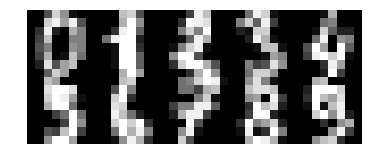

In [3]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print ("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Make sure to comment your code!

In [4]:
#we define our prediction function
def prediction_function(x,theta):
    ex = exp(-dot(theta.T,x))
    return 1/(1+ ex)

In [5]:
#define our cost function
def cost_function(x_predict,y):
    cost = (y*log(x_predict)) + (1-y)*log(1-x_predict)
    J = sum(cost) / (x.shape[0])
    return cost

In [6]:
#we create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    dtheta = outer((x_predict - y),x)
    return dtheta     

correct tests   percentage correctly classified   number of iterations
259             87.21                             0
260             87.54                             1
260             87.54                             2
262             88.22                             3
262             88.22                             4
262             88.22                             5
261             87.88                             6
261             87.88                             7
262             88.22                             8
263             88.55                             9
264             88.89                             10
265             89.23                             11
265             89.23                             12
265             89.23                             13
265             89.23                             14
265             89.23                             15
265             89.23                             16
264             88.89                 

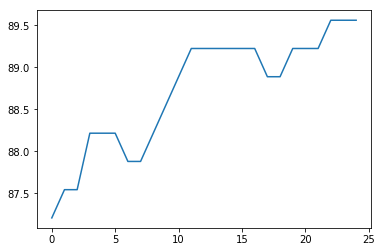

the percentage of correctly classified data: 89.56228956228956
the yellow graph is the cost of the test set and the blue graph the cost of the training set


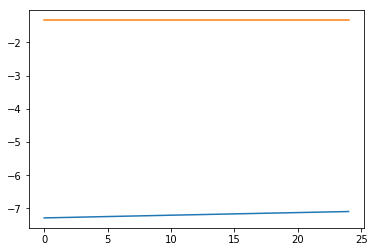

In [26]:
#Variables
start_iterations = 25
theta = np.zeros((64,10))
stop_condition = 1
cost = 10
alpha = 0.01


#we reshape our data such that it 3D into 2D. 1500x array 
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))


#These are the target datasets
target = digits.target[:1500] #the first 1500 are for the training
target_test = digits.target[1500:] #the rest is for the testing



def optimaltheta(x, target, theta, iterations, alpha):          #Apply gradient descent and find the optimal values of theta
    for i in range(iterations):                                 
        cost = 0                                                #we start the cost at 0
        for j in range(x.shape[0]):                             
            x_predict = prediction_function(x[j,:],theta)       #we compute x_predict for all the iterations we go through
            y = np.zeros(10)                                    #we create an "initial" y vector of shape(10,) 
            y[target[j]] = 1                                    #set the right class equal to 1
            dtheta = compute_gradient(x_predict, y, x[j,:])     #we compute dtheta using gradient descend, partial derivative of the cost function
            
            theta = np.add(theta, np.multiply(-(alpha/(x.shape[0])),dtheta.T))   #compute theta                                                
    return theta



def plotcost(x, target, theta, iterations, alpha):      #create a function to return a list of cost values
    cost_list = []                                          #initialize our cost_list           
    for i in range(iterations):                               
        cost = 0                                            #let the cost start at 0    
        for j in range(x.shape[0]):                             
            x_predict = prediction_function(x[j,:],theta)   #define x_predict   
            y = np.zeros(10)                                #define the "initial" zero vector again    
               
            
            y[target[j]] = 1                                #set the right class (right number) equal to 1 
            #set the right class (right number) equal to 1
            cost += cost_function(x_predict,y)[0]           #sum all the cost of the iterations up together       
            
    
            dtheta = compute_gradient(x_predict, y, x[j,:])  #compute dtheta   
            
            
            theta = np.add(theta, np.multiply(-(alpha/(x.shape[0])),dtheta.T))  #we find our theta that we use computing the cost
        cost_list.extend([cost])                                                #we add the cost value that we found in "this" iteration to the cost_list
    return cost_list



def plotcosttest(x,theta):                         #define a function which outputs a list of the cost values of the test set
    cost_list_test = []                            #create an initial empty cost list
    for i in range(iterations):
        cost = 0                                   #set the cost to 0 fist
        for j in range(x_test.shape[0]):
            x_predict = prediction_function(x[j,:], theta)   #compute x_pedict
            y = np.zeros(10)                                  #create an vector with only zeros 
            y[target[j]] = 1                                  #set the right class (right number) equal to 1
            cost += cost_function(x_predict, y)[0]            #sum all the cost of the iterations up together
        cost_list_test.extend([cost])                         #add the cost value found in "this" iteration to cost_list
    return cost_list_test
        
    
def howmanycorrect(x, target, theta):
    correct = 0                                               #set the counter correct to 0, we will add to this later
    for j in range(x_test.shape[0]):  
        x_predict_test = prediction_function(x[j,:], theta)   #compute the prediction function
        if x_predict_test.argmax() == target[j]:              #check if the highest prediction is the same as the target
            correct += 1                                      #add 1 to correct if the number that x_predict "predicts" the number to be, is equal to the number
    return correct
        
accuracy_list = []                                            #initialize the accuracy list 
iterations = start_iterations

print("correct tests", " ", "percentage correctly classified"," ", "number of iterations")
for i in range(iterations):
    theta = optimaltheta(x, target, theta, iterations, alpha)           #Do the gradient decent in order to find our correct value of theta 
    correct_tests = howmanycorrect(x_test, target_test, theta)          #Find the amount of correct test using the function we defined earlier
    percent = float(correct_tests) / x_test.shape[0] *100               #Calculate the percentage of the correct tests
    accuracy_list.append(percent)                                       #Save the percentage for this iteration
    print (correct_tests, "           ", ("%.2f" % percent),"                           ", i) #print the titles of the tables 
    


#In this section of the code we start plotting our graphs 

iterations_list = []                                         #initialize our iterations list
for i in range(iterations): 
    iterations_list.append(i)                                #we append the number of iterations to the iterations list
    
plt.plot(range(iterations), accuracy_list)                   #we plot the iterations to the accuracy
plt.show()    


print("the percentage of correctly classified data:", percent) #print the final percentage of good classifications

#now we want to plot the cost for the test 
costtrain = plotcost(x, target, theta, iterations, alpha)  #"calculate" the list of costs for the training set           
print("the yellow graph is the cost of the test set and the blue graph the cost of the training set")
plt.plot(np.arange(iterations), costtrain)                  #plot the cost over the number of iterations
costtest = plotcosttest(x,theta)                            #"calculate" the list of costs for the test set
plt.plot(np.arange(iterations), costtest)                   #plot the cost of the training set over the number of iterations
        

    


# Correct stopcondition

In this algorithm we do not have to use an stop condition. We do not need this as we are computing the cost withing a while loop, already indication when we need to stop calculating the cost. Moreover, we see that the cost does not change much over time, and therefore, it could be the case that the stop condition is never reached. 

# Preventing overfitting

we see that the cost of the test set (the yellow graph) is already almost zero. Therefore it is not necessercy to perform regularization, as we do not have overfitting. It makes sense that the cost of the test set is constant, as we do not update theta here, so theta is constant, so nothing changes in the cost function. However, outstanding is that the cost for the training set is almost equal to 0. We see that the cost of the training set only gets a little lower. This makes sense as our accuracy also gets just a little better over the interations. Apperently, our we do not have to update our theta's very much. The little difference in the theta's is reflected in the little difference in the cost function of the training set. 

# Systematically choose a learning rate 

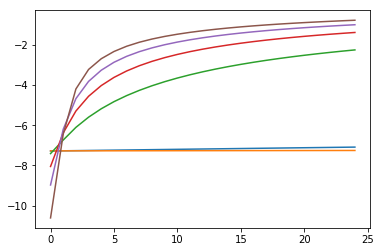

In [23]:
#to find the best alphas we plot the cost function 
costtrain1 = plotcost(x, target, theta, 25, 0.01)   #take alpha = 0.01
plt.plot(np.arange(iterations), costtrain1)
costtrain2 = plotcost(x, target, theta, 25, 0.001)  #take alpha = 0.01
plt.plot(np.arange(iterations), costtrain2)
costtrain3 = plotcost(x, target, theta, 25, 1)      #take alpha = 1
plt.plot(np.arange(iterations), costtrain3)
costtrain4 = plotcost(x, target, theta, 25, 2)      #take alpha = 2
plt.plot(np.arange(iterations), costtrain4)
costtrain5 = plotcost(x, target, theta, 25, 3)      #take alpha = 3
plt.plot(np.arange(iterations), costtrain5)
costtrain6 = plotcost(x, target, theta, 25, 4)      #take alpha = 4
plt.plot(np.arange(iterations), costtrain6)

In this graph, we see that the green line represents the cost for alpha = 0.01. We see that all the costs go to 0, so it seems as if we would need to choose the graph which goes fastest to 0, so brown in this case. However, we see that this graph has a high cost in the beginning. Therefore it is better to take the green graph, so alpha = 0.01, as the cost in total is smaller. We also see this when we plug in different values for alpha, we see that for alpha = 0.01 the accuracy is much higher than when we plug in alpha = 4. 

# Best score analysis
            

In the table and in plot 1 we see that the maximum percentage of accuracy is 87.88. We optain this percentage when we have 10 iterations and when we have 19 tm 23 iterations. We can also see this in the graph, we indeed see that there is a peek at 10 iterations, and a "flat peek" at 19 tm 23 iterations. 

# Summary

In this function I have written a code to implement logestic regresion to our data set, in order rightly classify the handwritten numbers. I implemented the function x_predict, which is the hypothesis function, which predicts "the chances of a certain data set to be a certain number. Then we computed our optimal theta's in a while loop using gradient descend. we let our while loop go through all the 1500 different arrays with data of x (shape of x is (1500,64), where the 64 represents "values that we assign to the digits" , and a number consists of 64 digits. We thus have 1500 different "examples" and we range through all of them.

Then we compute the costst of each iteration in the training phase, and all apend them in a list cost_list. We do the same for the costst in the test phase and append them in a list cost_test_list. Then we define the function "howmanycorrect", which counts how many times the prediction function actually predicts the "right number". 

We then finally actually compute the optimal value of theta, which we use to compute how many of the tests are correct. Then we compute the percentage of the number of correctly classified tests. We append these percenteges to an initially empty list accuacy_list. 

Then we start plotting our graphs. We first print the table with the number of correct tests, the percentage of correct tests, and the number of iterations. The we plot the number of iterations against the percentage of correctly classified tests. Afterwards we plot the costst of the training phase and the test phase against the number of iterations.

Finally, we plot the costst for different values of alpha, so we determine what is our optimal alpha 






Lars Kouwenhoven and I worked on our codes together. Therefore, our codes might be similar, however, we both created our own codes. 